# Final Project, Part 3: Exploratory Data Analysis 
[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction) research

## Load open source libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
%matplotlib inline

## Define useful functions

In [2]:
def get_feed_info(df):
    # print general info about data frame
    print "Shape of dataset: ", df.shape
    print "Summary of data frame:\n", df.info()
    
    # check on missing values
    rows_count = len(df)
    rows_with_missing_data = df.shape[0] - df.dropna().shape[0]
    print "There are ", rows_with_missing_data, " row(s) out of ", rows_count, " have missing values."

def get_target_stats(df):
    print "Satisfied customers:", df[df.TARGET==0]['ID'].count()
    print "Unsatisfied customers:", df[df.TARGET==1]['ID'].count()
    
def get_column_info(df,column):
    # print general info about column
    print df[column].describe()
    
    # show histogram amd box plot
    plt.figure()
    df[df.TARGET==0][column].plot(kind="hist", label="satisfied customers")
    df[df.TARGET==1][column].plot(kind="hist", label="unsatisfied customers")
    plt.legend();

    plt.figure()
    df[column].plot(kind='box')    

## Load datasets

In [3]:
df_train = pd.read_csv("data/train.csv")
get_feed_info(df_train)
get_target_stats(df_train)

Shape of dataset:  (76020, 371)
Summary of data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.8 MB
None
There are  0  row(s) out of  76020  have missing values.
Satisfied customers: 73012
Unsatisfied customers: 3008


In [4]:
df_test = pd.read_csv("data/test.csv")
get_feed_info(df_test)

Shape of dataset:  (75818, 370)
Summary of data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.6 MB
None
There are  0  row(s) out of  75818  have missing values.


## var38 research

I am going to start with var38 variable research because I suppose that var38 is customer's account balance. And I would like to see if there is relationship between customer's satisfaction and account balance.

count       76020.000000
mean       117235.809430
std        182664.598503
min          5163.750000
25%         67870.612500
50%        106409.160000
75%        118756.252500
max      22034738.760000
Name: var38, dtype: float64
Satisfied customers: 73012
Unsatisfied customers: 3008


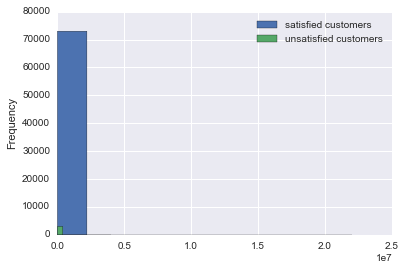

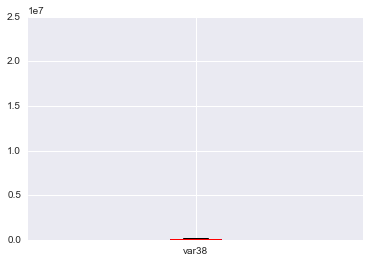

In [548]:
get_column_info(df_train,"var38")
get_target_stats(df_train)

There is huge difference between 3rd quartile and max value. I am going to use Tukey Method (interquartile range) to filter very large and very small numbers in var38.
<br>Low outliers = Q1 - 1.5(Q3 - Q1) 
<br>High outliers = Q3 + 1.5(Q3 - Q1)

In [550]:
Q1 = df_train.var38.quantile(.25)
Q3 = df_train.var38.quantile(.75)
low_limit = Q1 - 1.5*(Q3 - Q1)  
# It is -8457.8475. As far as it is negative, I am going to set low limit to 0
low_limit = 0
high_limit = Q3 + 1.5*(Q3 - Q1)
print "Low limit for outliers: ", low_limit
print "High limit for outliers: ", high_limit

var38_outliers = df_train[(df_train.var38>high_limit) | (df_train.var38<low_limit)]['ID'].count()
var38_1 = df_train[(df_train.var38>high_limit) & (df_train.TARGET==1)]['ID'].count()
print "The amount of an unsatisfied customers that have outliers in var38 is", var38_1, "out of", var38_outliers

Low limit for outliers:  0
High limit for outliers:  195084.7125
The amount of an unsatisfied customers that have outliers in var38 is 148 out of 6530


In [551]:
# I decided to remove rows with outliers in var38 to see the more clear 
# picture of var38 column 
df_clean_var38 = df_train[(df_train.var38<high_limit) & (df_train.var38>low_limit)]
print "Shape of dataset: ", df_clean_var38.shape

Shape of dataset:  (69490, 371)


Let's take a look on our "balance" data after correction.

count     69490.000000
mean      95496.241818
std       37065.177911
min        5163.750000
25%       65072.670000
50%       98034.765000
75%      117310.979016
max      195065.250000
Name: var38, dtype: float64
Satisfied customers: 66630
Unsatisfied customers: 2860


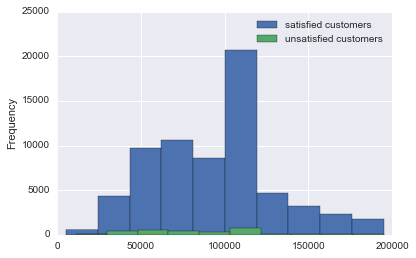

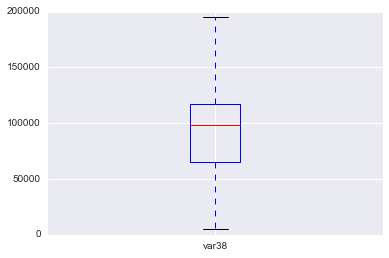

In [552]:
get_column_info(df_clean_var38,"var38")
get_target_stats(df_clean_var38)

Ok, I am not sure if there is relationship between customer's satisfaction and account balance. So, I am going to take a look at our data in general.

## Descriptive statistics

In [553]:
d_stats = df_train.describe()
pd.options.display.max_columns = d_stats.shape[1]
d_stats

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

It seems that var3 contains incorrect value of -999999. Also several columns have 0 value as min and max. I am going to remove those columns as far as they don't contain any useful information. Another words, they are empty.

## Check for empty columns

In [556]:
# get empty columns
zero_columns = df_train.columns[df_train.iloc[:,:370].max() == 0].tolist()
print "The following", len(zero_columns), "columns out of", df_train.shape[1], "are empty:\n", zero_columns

The following 34 columns out of 371 are empty:
['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [557]:
# Remove empty columns from both datasets
df_train.drop(zero_columns, axis=1, inplace=True)
print "Train dataset:", df_train.shape

df_test.drop(zero_columns, axis=1, inplace=True)
print "Test dataset:", df_test.shape

Train dataset: (76020, 337)
Test dataset: (75818, 336)


## Check for duplicated columns

In [559]:
# find duplicated columns
dup_columns = []
columns = df_train.columns
for i in range(len(columns)-1):
    v = df_train[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,df_train[columns[j]].values):
            dup_columns.append(columns[j])

print "The following", len(dup_columns), "columns are duplicated:\n", dup_columns

The following 29 columns are duplicated:
['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


In [560]:
# Remove duplicated columns from both datasets
df_train.drop(dup_columns, axis=1, inplace=True)
print "Train dataset:", df_train.shape

df_test.drop(dup_columns, axis=1, inplace=True)
print "Test dataset:", df_test.shape

Train dataset: (76020, 308)
Test dataset: (75818, 307)


In [536]:
# Probably I have to set correct value for var3 in case of -999999...not sure which one
# I am going to continue research to see if this column is important for prediction.

# df_train.var3.unique()
# -999999

## Find correlations

In [561]:
# column correlations
correlations = df_train.corr().abs()

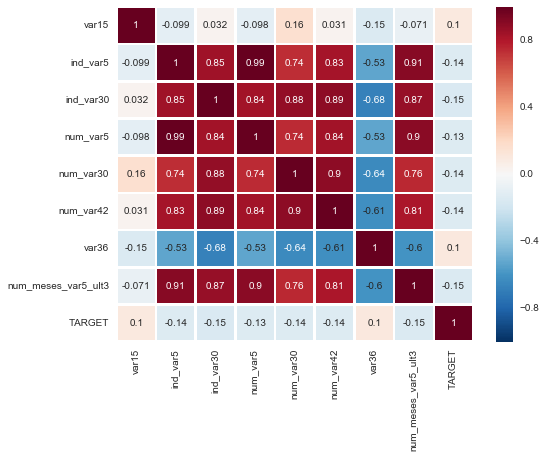

In [569]:
# get list of collumns correlated with TARGET
X = df_train.columns[df_train.iloc[:,:307].corrwith(df_train.TARGET).abs()>0.1].tolist()
y = ["TARGET"]
corr_data = df_train[X].join(df_train[y])
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, linewidths=1.5)

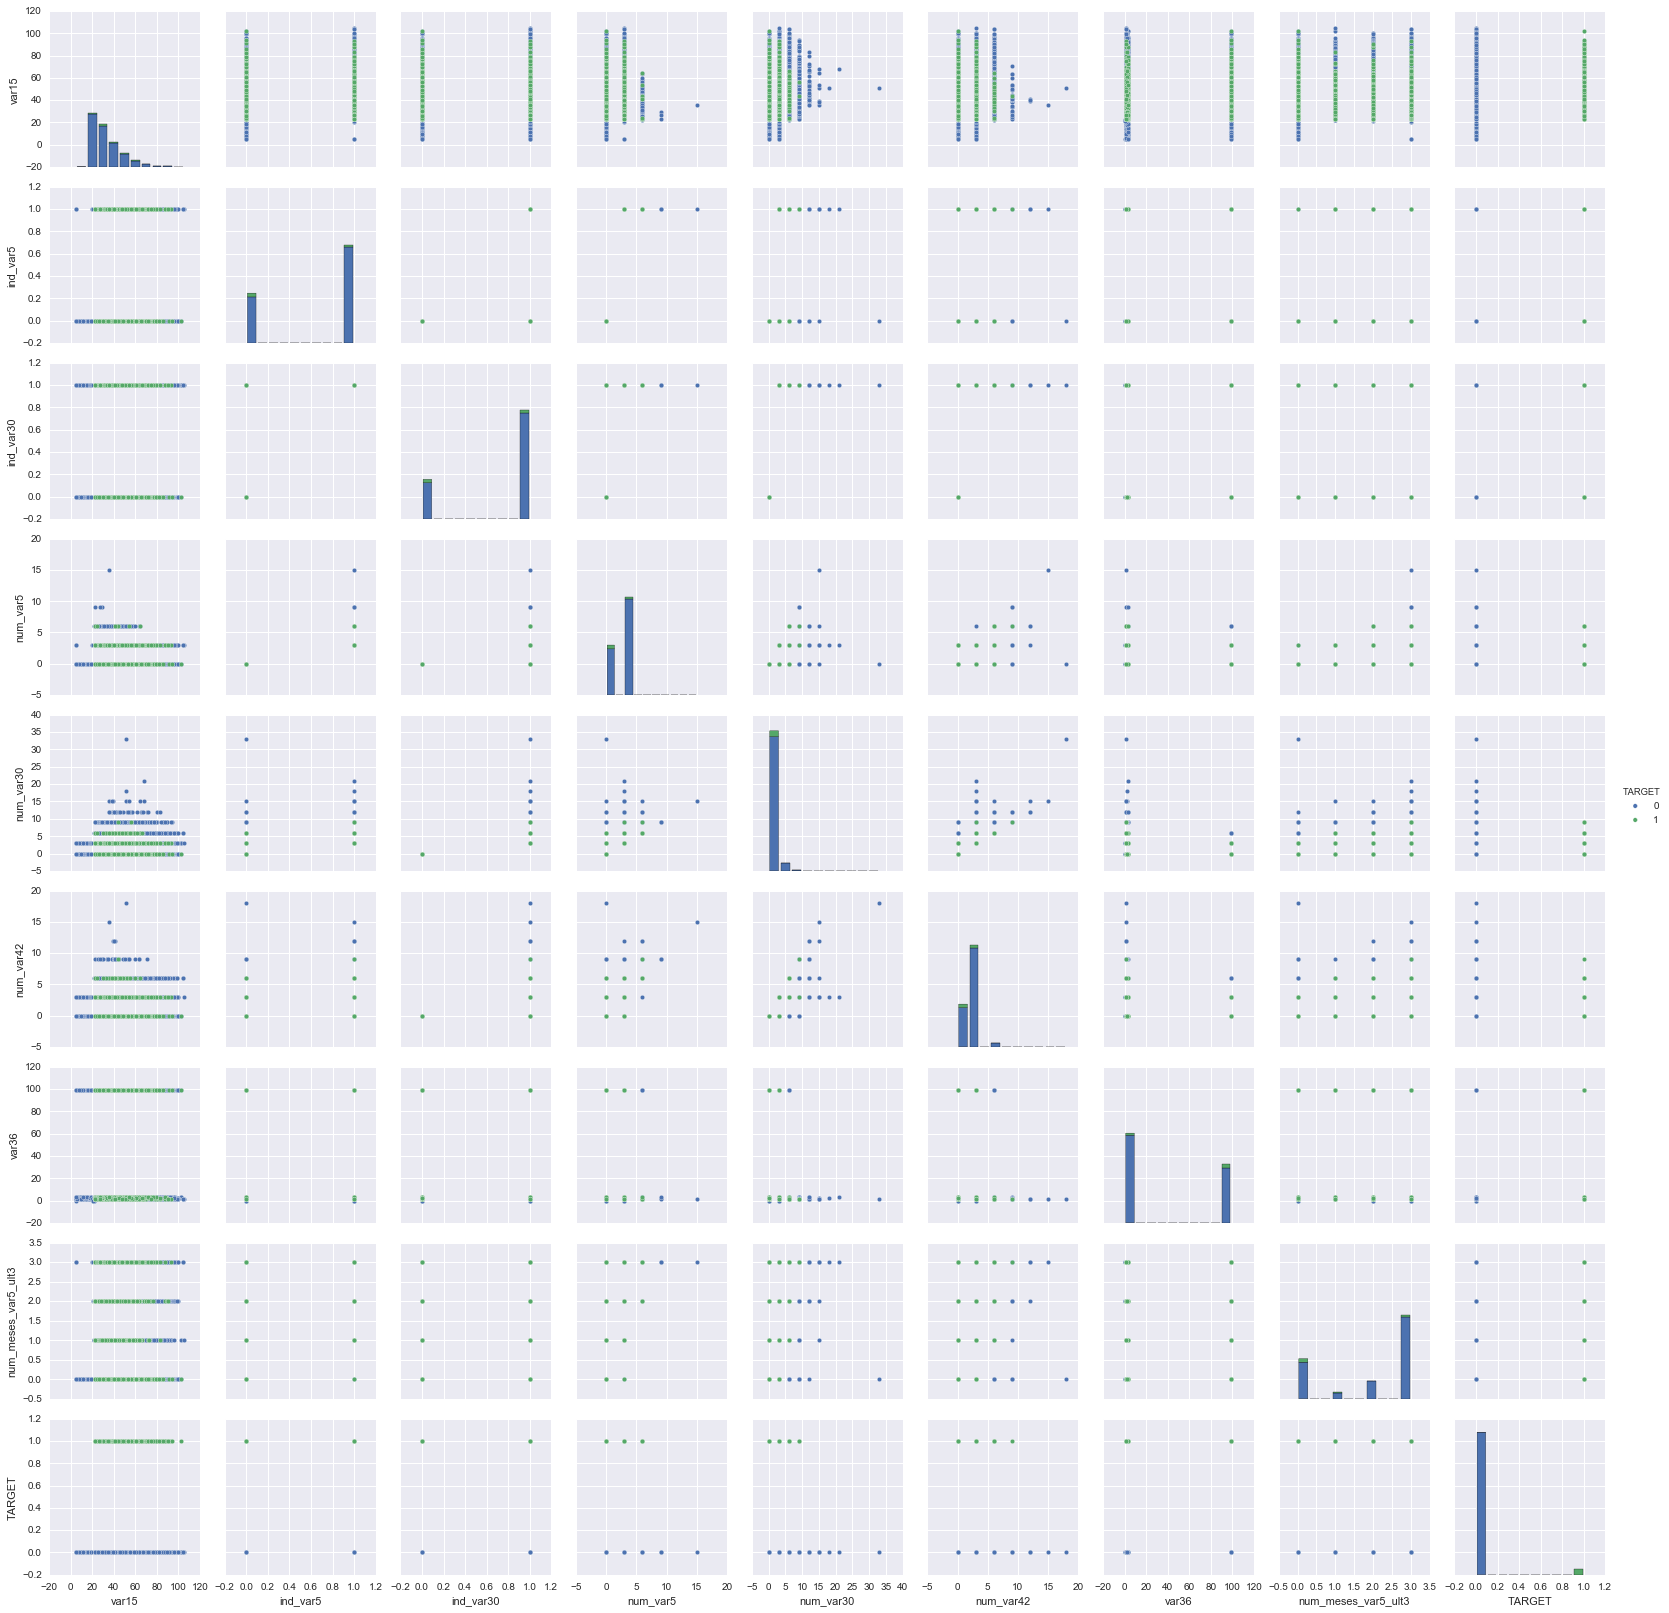

In [570]:
sns.pairplot(corr_data, hue="TARGET")

It is still not obvious to me which columns I should use for prediction. I decided to research dataset using scikit-learn library.

## Prepare train and test dataset for further analysis

In [571]:
# train dataset
y_train = df_train['TARGET']
X_train = df_train.drop(['ID','TARGET'], axis=1)
y_train.to_csv('data/y_train.csv', sep=',')
X_train.to_csv('data/X_train.csv', sep=',')

# test dataset
id_test = df_test['ID']
X_test = df_test.drop(['ID'], axis=1)
id_test.to_csv('data/id_test.csv', sep=',')
X_test.to_csv('data/X_test.csv', sep=',')

## Feature selection¶

In [573]:
# use GradientBoosting to find important features
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [579]:
# get important columns sorted
important_columns = gbc.feature_importances_
indices = np.argsort(important_columns)[::-1]

# get 5 the most important features
top5 = []
for column in range(0,5):
    top5.append(X_train.columns[indices[column]])
    
print "The most important features:\n", top5

The most important features:
['saldo_var30', 'var15', 'var38', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3']


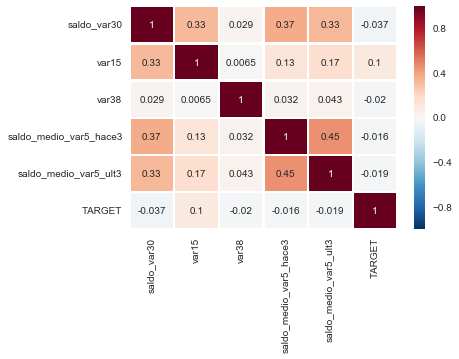

In [583]:
# visualize top 5 features
top_features = df_train[top5].join(df_train["TARGET"])
sns.heatmap(top_features.corr(), annot=True, linewidths=1.5)

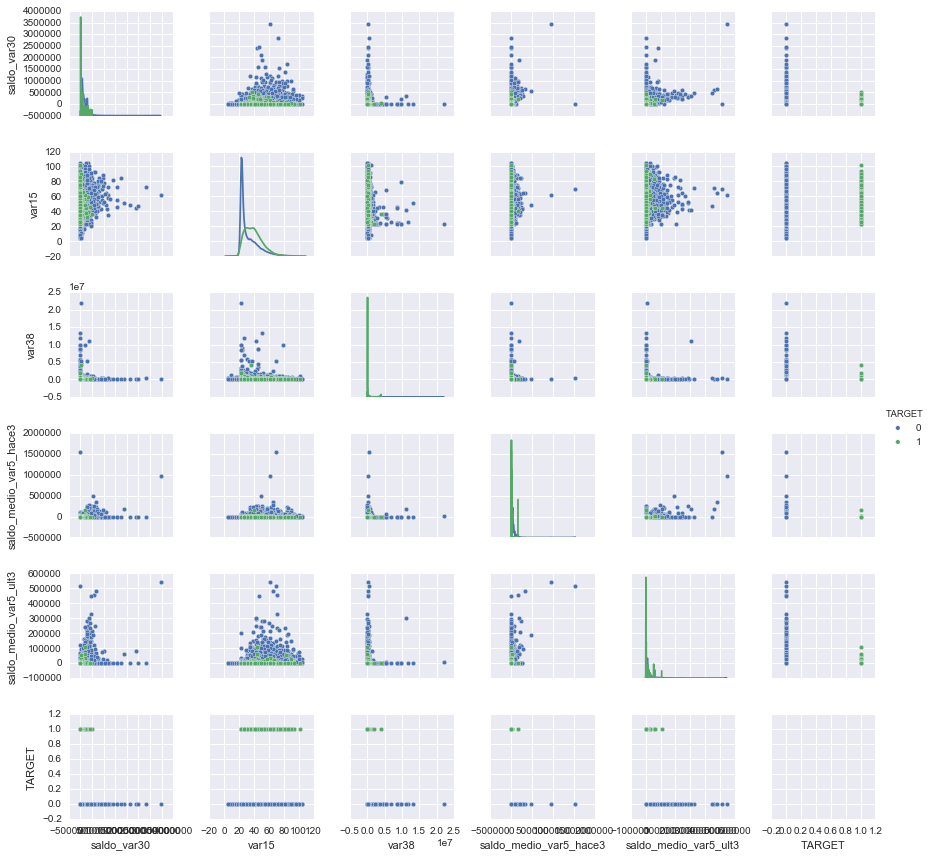

In [582]:
sns.pairplot(top_features, hue="TARGET", size=2, diag_kind="kde")

I am going to use the most important 5 features that I found using GradientBoosting to predict if customer is unsatisfied during next stage of my research.